# Demo - Verification binaries
This demo uses ``LEGWORK`` to show how you can interact with the LISA verification binaries

In [1]:
%matplotlib inline

In [2]:
import legwork as lw
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In order to gain access to all of the verification binary data from Kupfer+18, you can simply run the following.

In [4]:
vbs = lw.source.VerificationBinaries()

Generating random values for source polarisations


This returns a `Source` class that contains all of the verification binary data in the usual variables, but with two extra variables:
- labels: contains the designation of each binary
- true_snr: the SNR calculated by Kupfer+18

For instance, we can plot the SNR each source and label them:

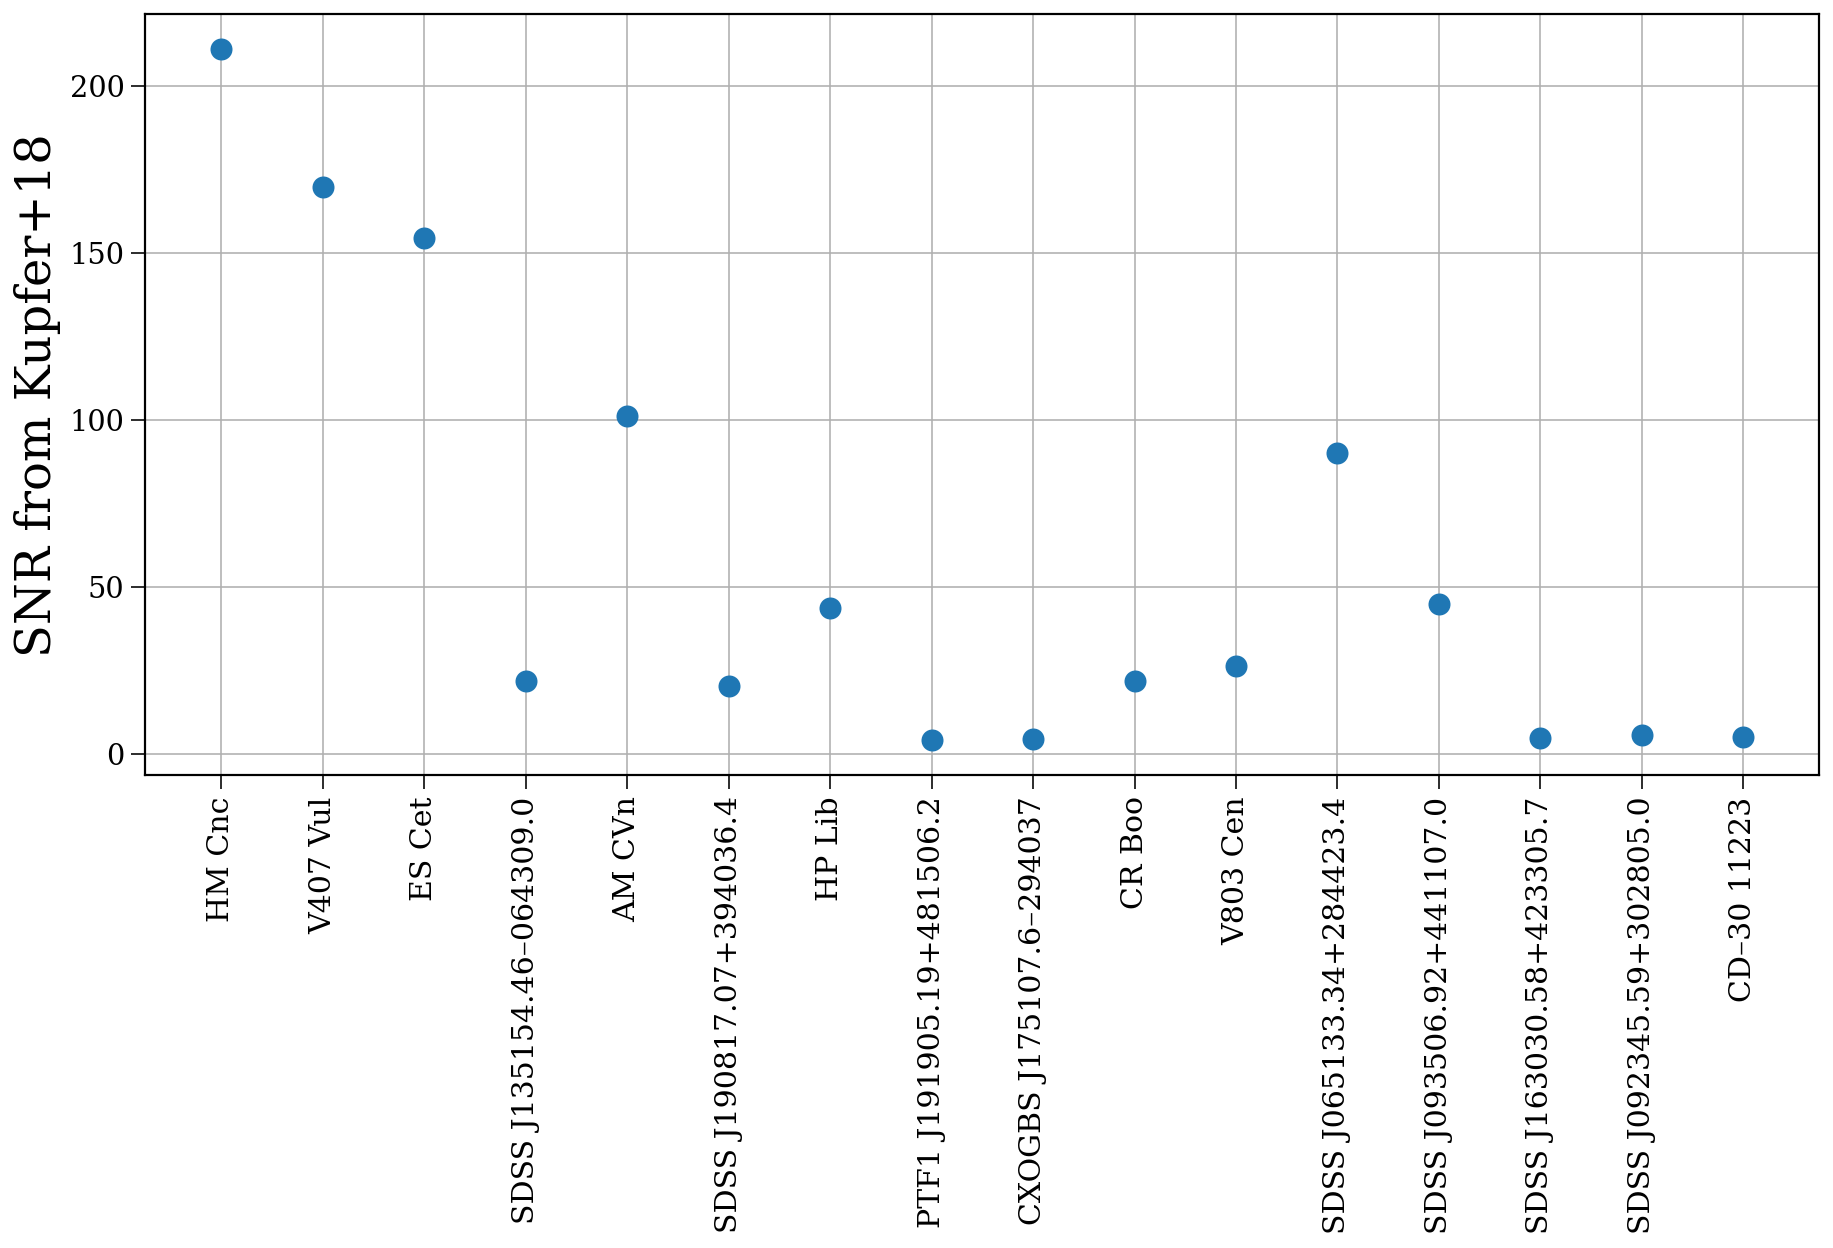

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(range(vbs.n_sources), vbs.true_snr, zorder=10, s=100)

ax.set_xticks(range(vbs.n_sources))
ax.set_xticklabels(vbs.labels, rotation=90, fontsize=15)

ax.grid()

ax.set_ylabel("SNR from Kupfer+18")

plt.show()

It is important to highlight that SNR returned by LEGWORK will not give the same values as the `true_snr`. This is because Kupfer+18 use a full LISA simulation which would not be feasible for a large number of sources and is beyond the scope of LEGWORK. We instead would use averaged equations as outlined in our derivations and thus find different values for the SNR.

In [6]:
vbs.get_snr()
print(vbs.snr / vbs.true_snr)

[0.31745572 0.40147318 0.35145735 0.75886421 0.73971397 0.91649546
 0.50660766 0.6879779  0.63530679 0.32105153 0.33755544 0.28420505
 0.84977004 0.62591797 0.4952035  0.27892681]


So for now let's simply set the SNR equal to the true SNR and plot them on the sensitivity curve!

In [7]:
vbs.snr = np.array(vbs.true_snr)

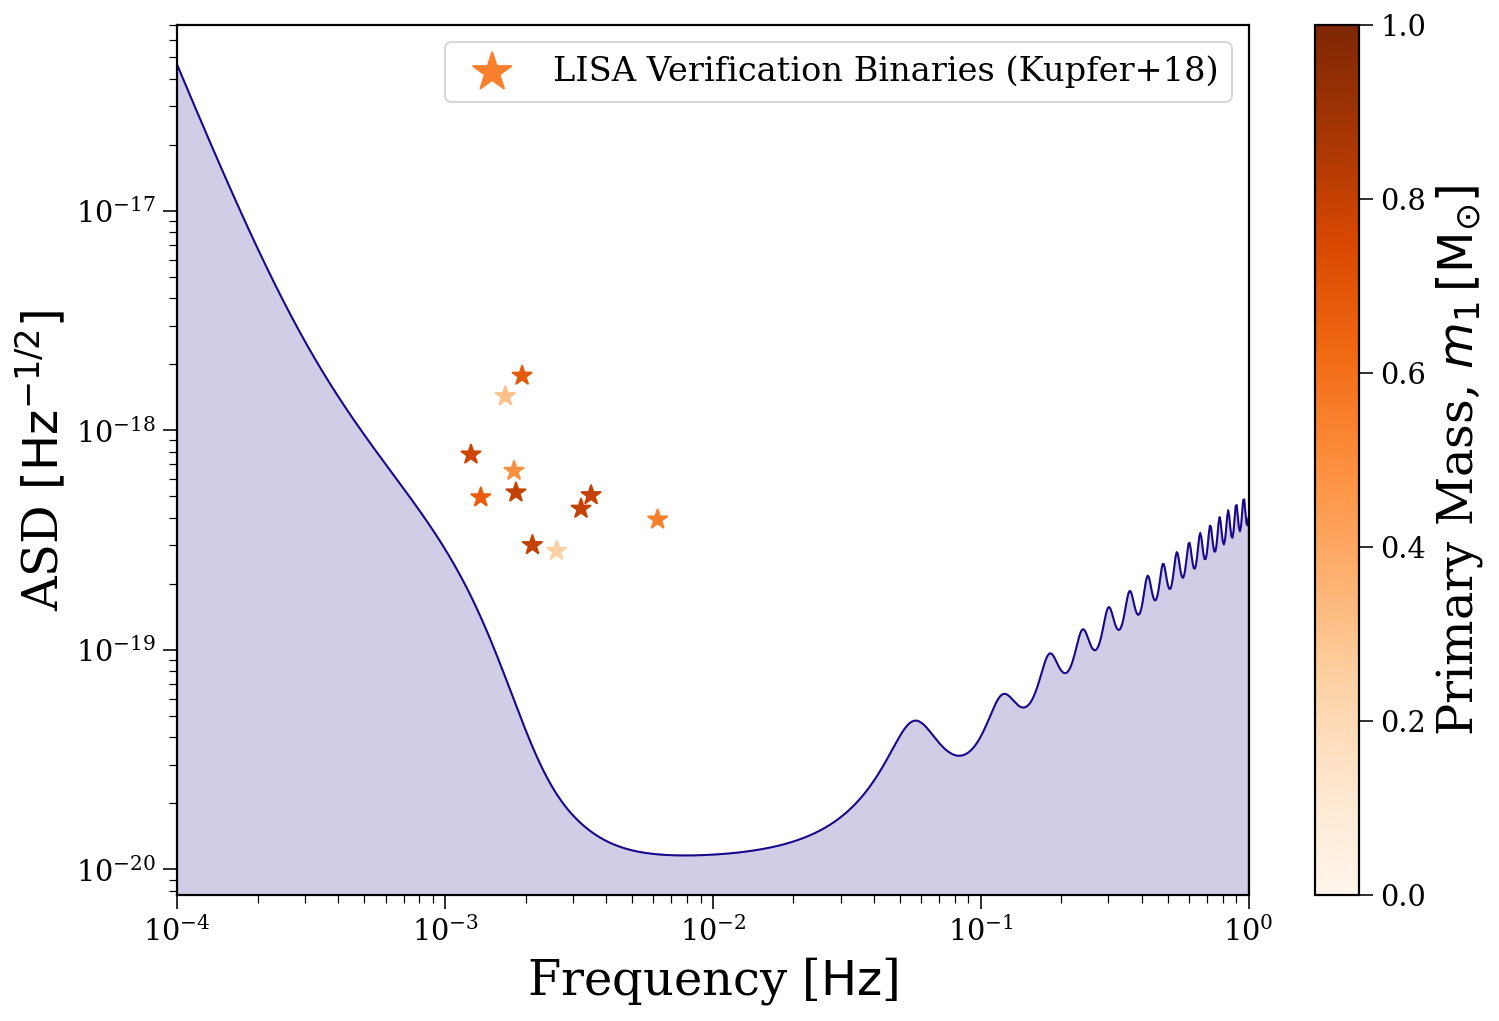

In [8]:
fig, ax = lw.visualisation.plot_sensitivity_curve(frequency_range=np.logspace(-4, 0, 1000) * u.Hz,
                                                  show=False)
fig, ax = vbs.plot_sources_on_sc(scatter_s=100, marker="*", snr_cutoff=7, c=vbs.m_1[vbs.snr > 7].to(u.Msun),
                                 fig=fig, ax=ax, show=False, cmap="Oranges", vmin=0.0, vmax=1.0)
cbar = fig.colorbar(ax.get_children()[1])
cbar.set_label(r"Primary Mass, $m_1 \, [{\rm M_{\odot}}]$")

ax.legend(handles=[ax.get_children()[1]], labels=["LISA Verification Binaries (Kupfer+18)"], fontsize=0.7*fs, markerscale=2)

plt.show()